# Matching on Occupations

### a. Install packages and read in data

In [ ]:
# install.packages(c('Matching', 'rgenoud', 'ggplot2', 'cobalt', 'patchwork'))
library(patchwork)
library(Matching)
library(rgenoud)
library(ggplot2)
library(cobalt)

In [ ]:
# read in data
accountant = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/accountant.csv')
copywriter = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/copywriter.csv')
designer = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/designer.csv')
marketer = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/marketer.csv')
swe = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/software_engineer.csv')
translator = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/translator.csv')

### b. Randomly sample 1000 data points for testing

In [ ]:
# sample = accountant[sample(nrow(accountant), 200), ]
# head(sample)

### c. Matching for accountants

In [ ]:
attach(accountant)
# attach(sample)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
hourly_rate_mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
pay_grade_mout <- Match(X=X, Y=pay_grade, Tr=gender, Weight.matrix=genout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=hourly_rate_mout, nboots=1000)
summary(mb)

The following objects are masked from sample:

    avg_rating, badge_plus_membership, badge_preferred_freelancer,
    badge_verified, design_skills, engineering_skills,
    finance_accounting_skills, freelancer_certifications, gender,
    general_skill_certifications, hourly_rate, join_date_from_earliest,
    language_certifications, language_translation_skills,
    location_size, management_skills, marketing_business_skills,
    miscellaneous_skills, name, num_recommendations, num_reviews,
    pay_grade, pct_jobs_completed, pct_on_budget, pct_on_time,
    performance_arts_skills, programming_certifications, search_query,
    teaching_training_skills, technical_programming_skills,
    top_skill_category, top_skill_category_count,
    top_skill_category_encoded, verification_email_verified,
    verification_facebook_connected, verification_identity_verified,
    verification_payment_verified, verification_phone_verified,
    verification_preferred_freelancer, writing_skills




Fri Apr 

                    Length Class  Mode     
BeforeMatching      17     -none- list     
AfterMatching       17     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    1     -none- character
BMsmallestVarNumber  1     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    2     -none- character
AMsmallestVarNumber  2     -none- numeric  

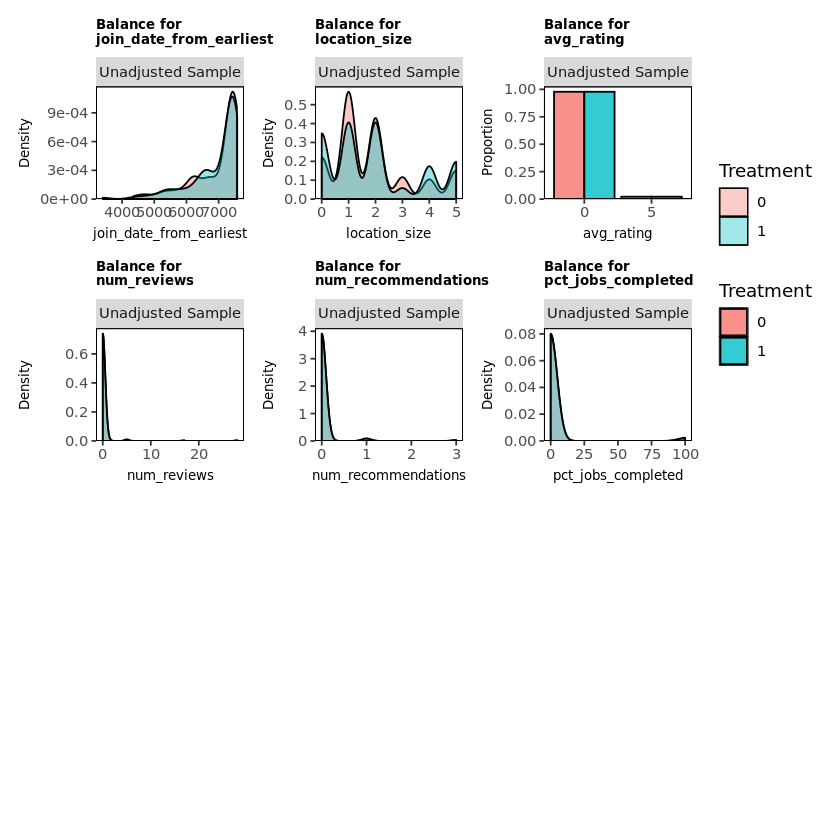

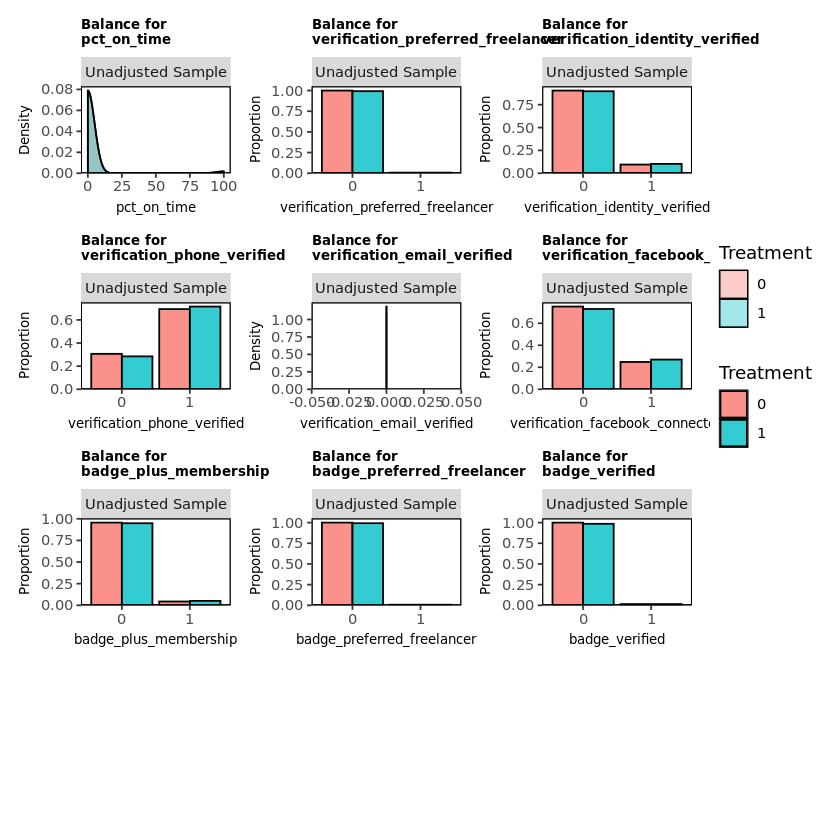

In [ ]:
#Get matched dataset for accountants
accountant_matched_dataset= rbind(accountant[hourly_rate_mout$index.treated,],accountant[hourly_rate_mout$index.control,])

#Create distributional balance plots
covariates <- list('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for(i in 1:length(covariates)) {                    # assign function within loop
  assign(paste0("cov_", i), bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=accountant_matched_dataset, var.name= covariates[[i]])
  + labs(title= sprintf("Balance for\n%s", covariates[[i]])) 
  + theme(plot.title = element_text(size=8, face="bold"), axis.title.x = element_text(size=8), axis.title.y = element_text(size=8) ))
}

cov_1 + cov_2 + cov_3 + cov_4 + cov_5 + cov_6 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

cov_7 + cov_8 + cov_9 + cov_10 + cov_11 + cov_12 + cov_13 + cov_14 +
cov_15 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

In [ ]:
#Check treatment effect estimate
sprintf("HOURLY RATE")
summary(hourly_rate_mout)

sprintf("PAY GRADE")
summary(pay_grade_mout)

[1] "HOURLY RATE"


Estimate...  2.2273 
AI SE......  5.3695 
T-stat.....  0.4148 
p.val......  0.67829 

Original number of observations..............  259 
Original number of treated obs...............  132 
Matched number of observations...............  132 
Matched number of observations  (unweighted).  137 



[1] "PAY GRADE"


Estimate...  -0.039394 
AI SE......  0.067553 
T-stat.....  -0.58316 
p.val......  0.55979 

Original number of observations..............  259 
Original number of treated obs...............  132 
Matched number of observations...............  132 
Matched number of observations  (unweighted).  137 



### d. Matching for copywriters

In [ ]:
attach(copywriter)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
hourly_rate_mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
pay_grade_mout <- Match(X=X, Y=pay_grade, Tr=gender, Weight.matrix=genout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=hourly_rate_mout, nboots=1000)
summary(mb)

The following objects are masked from accountant:

    avg_rating, badge_plus_membership, badge_preferred_freelancer,
    badge_verified, design_skills, engineering_skills,
    finance_accounting_skills, freelancer_certifications, gender,
    general_skill_certifications, hourly_rate, join_date_from_earliest,
    language_certifications, language_translation_skills,
    location_size, management_skills, marketing_business_skills,
    miscellaneous_skills, name, num_recommendations, num_reviews,
    pay_grade, pct_jobs_completed, pct_on_budget, pct_on_time,
    performance_arts_skills, programming_certifications, search_query,
    teaching_training_skills, technical_programming_skills,
    top_skill_category, top_skill_category_count,
    top_skill_category_encoded, verification_email_verified,
    verification_facebook_connected, verification_identity_verified,
    verification_payment_verified, verification_phone_verified,
    verification_preferred_freelancer, writing_skills


The fo

                    Length Class  Mode     
BeforeMatching      17     -none- list     
AfterMatching       17     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    1     -none- character
BMsmallestVarNumber  1     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    2     -none- character
AMsmallestVarNumber  2     -none- numeric  

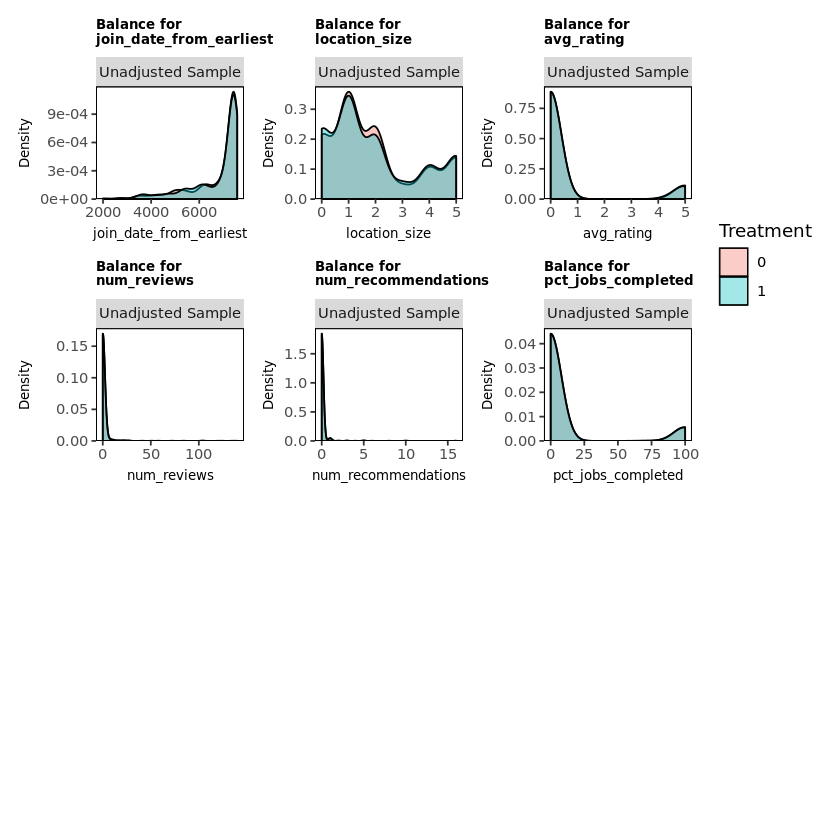

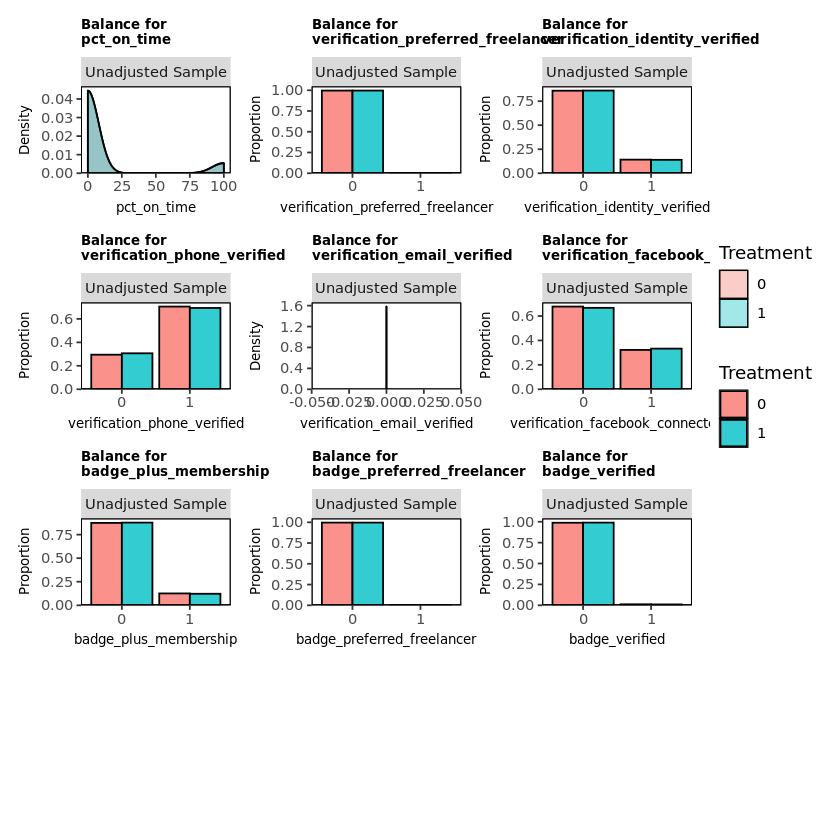

In [ ]:
#Get matched dataset for copywriters
copywriter_matched_dataset= rbind(copywriter[hourly_rate_mout$index.treated,],copywriter[hourly_rate_mout$index.control,])

#Create distributional balance plots
covariates <- list('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for(i in 1:length(covariates)) {                    # assign function within loop
  assign(paste0("cov_", i), bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=copywriter_matched_dataset, var.name= covariates[[i]])
  + labs(title= sprintf("Balance for\n%s", covariates[[i]])) 
  + theme(plot.title = element_text(size=8, face="bold"), axis.title.x = element_text(size=8), axis.title.y = element_text(size=8) ))
}

cov_1 + cov_2 + cov_3 + cov_4 + cov_5 + cov_6 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

cov_7 + cov_8 + cov_9 + cov_10 + cov_11 + cov_12 + cov_13 + cov_14 +
cov_15 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

In [ ]:
#Check treatment effect estimate
sprintf("HOURLY RATE")
summary(hourly_rate_mout)

sprintf("PAY GRADE")
summary(pay_grade_mout)

[1] "HOURLY RATE"


Estimate...  0.072233 
AI SE......  3.4057 
T-stat.....  0.021209 
p.val......  0.98308 

Original number of observations..............  1154 
Original number of treated obs...............  533 
Matched number of observations...............  533 
Matched number of observations  (unweighted).  580 



[1] "PAY GRADE"


Estimate...  0.00394 
AI SE......  0.038389 
T-stat.....  0.10263 
p.val......  0.91826 

Original number of observations..............  1154 
Original number of treated obs...............  533 
Matched number of observations...............  533 
Matched number of observations  (unweighted).  580 



### e. Matching for designers

In [ ]:
attach(designer)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
hourly_rate_mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
pay_grade_mout <- Match(X=X, Y=pay_grade, Tr=gender, Weight.matrix=genout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=hourly_rate_mout, nboots=1000)
summary(mb)

mean............ 4.791079e+02
variance........ 9.469924e+04
var 5:
best............ 6.208461e+02
mean............ 4.085324e+02
variance........ 9.368031e+04
var 6:
best............ 2.936568e+02
mean............ 4.386175e+02
variance........ 7.886850e+04
var 7:
best............ 2.563038e+01
mean............ 5.108382e+02
variance........ 7.942891e+04
var 8:
best............ 6.755740e+02
mean............ 5.096335e+02
variance........ 7.962430e+04
var 9:
best............ 9.737401e+02
mean............ 5.444217e+02
variance........ 8.002642e+04
var 10:
best............ 9.103637e+02
mean............ 4.710915e+02
variance........ 9.685646e+04
var 11:
best............ 7.888565e+02
mean............ 5.239742e+02
variance........ 9.883917e+04
var 12:
best............ 8.597316e+02
mean............ 4.977648e+02
variance........ 1.085366e+05
var 13:
best............ 4.425961e+02
mean............ 5.359073e+02
variance........ 8.014706e+04
var 14:
best............ 4.672103e+02
mean............ 5.745603

                    Length Class  Mode     
BeforeMatching      17     -none- list     
AfterMatching       17     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    1     -none- character
BMsmallestVarNumber  1     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    1     -none- character
AMsmallestVarNumber  1     -none- numeric  

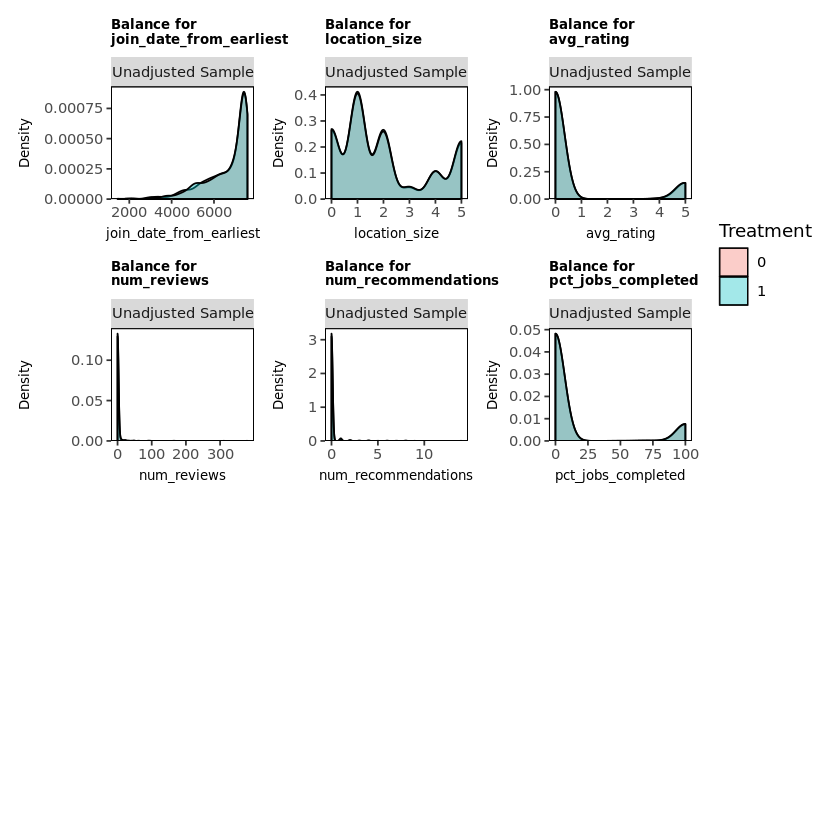

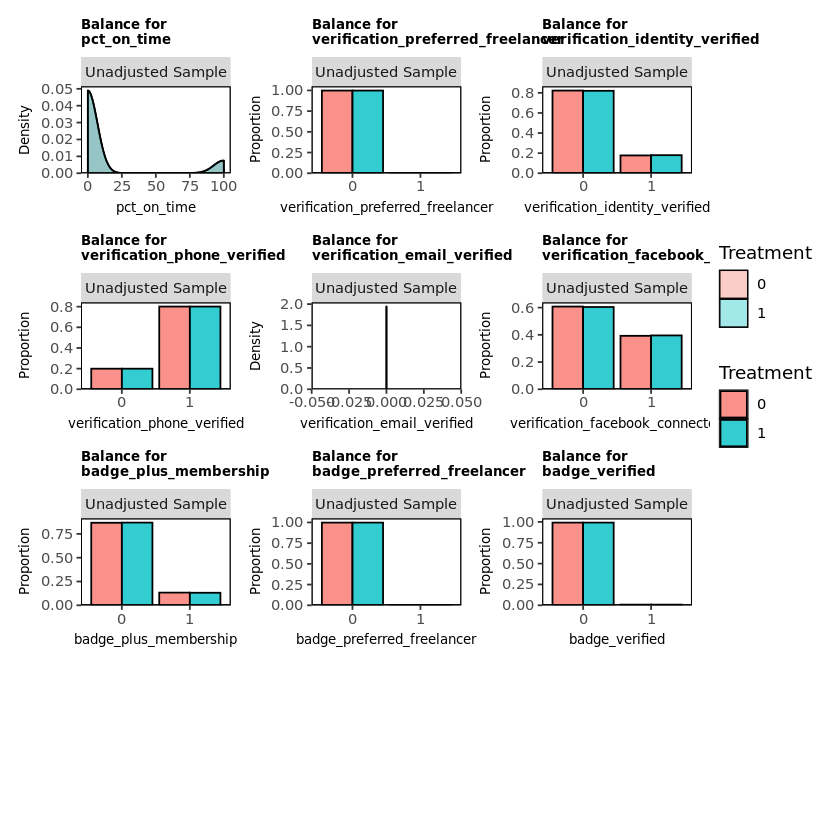

In [ ]:
#Get matched dataset for designer
designer_matched_dataset= rbind(designer[hourly_rate_mout$index.treated,],designer[hourly_rate_mout$index.control,])

#Create distributional balance plots
covariates <- list('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for(i in 1:length(covariates)) {                    # assign function within loop
  assign(paste0("cov_", i), bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=designer_matched_dataset, var.name= covariates[[i]])
  + labs(title= sprintf("Balance for\n%s", covariates[[i]])) 
  + theme(plot.title = element_text(size=8, face="bold"), axis.title.x = element_text(size=8), axis.title.y = element_text(size=8) ))
}

cov_1 + cov_2 + cov_3 + cov_4 + cov_5 + cov_6 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

cov_7 + cov_8 + cov_9 + cov_10 + cov_11 + cov_12 + cov_13 + cov_14 +
cov_15 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

In [ ]:
#Check treatment effect estimate
sprintf("HOURLY RATE")
summary(hourly_rate_mout)

sprintf("PAY GRADE")
summary(pay_grade_mout)

[1] "HOURLY RATE"


Estimate...  -2.7961 
AI SE......  1.4017 
T-stat.....  -1.9948 
p.val......  0.046061 

Original number of observations..............  3944 
Original number of treated obs...............  1434 
Matched number of observations...............  1434 
Matched number of observations  (unweighted).  1613 



[1] "PAY GRADE"


Estimate...  0.025523 
AI SE......  0.020019 
T-stat.....  1.275 
p.val......  0.20232 

Original number of observations..............  3944 
Original number of treated obs...............  1434 
Matched number of observations...............  1434 
Matched number of observations  (unweighted).  1613 



### f. Matching for marketers

In [ ]:
attach(marketer)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
hourly_rate_mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
pay_grade_mout <- Match(X=X, Y=pay_grade, Tr=gender, Weight.matrix=genout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=hourly_rate_mout, nboots=1000)
summary(mb)

mean............ 5.634925e+02
variance........ 9.503070e+04
var 5:
best............ 1.000000e+00
mean............ 4.813147e+02
variance........ 9.316669e+04
var 6:
best............ 1.000000e+00
mean............ 4.888830e+02
variance........ 8.492722e+04
var 7:
best............ 1.000000e+00
mean............ 5.502916e+02
variance........ 7.874444e+04
var 8:
best............ 1.000000e+00
mean............ 4.628970e+02
variance........ 9.127918e+04
var 9:
best............ 1.000000e+00
mean............ 5.051404e+02
variance........ 7.954819e+04
var 10:
best............ 1.000000e+00
mean............ 4.507234e+02
variance........ 8.729089e+04
var 11:
best............ 1.000000e+00
mean............ 5.286857e+02
variance........ 9.678525e+04
var 12:
best............ 1.000000e+00
mean............ 4.607550e+02
variance........ 7.631861e+04
var 13:
best............ 1.000000e+00
mean............ 5.287902e+02
variance........ 9.940653e+04
var 14:
best............ 1.000000e+00
mean............ 4.637521

                    Length Class  Mode     
BeforeMatching      17     -none- list     
AfterMatching       17     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    1     -none- character
BMsmallestVarNumber  1     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    1     -none- character
AMsmallestVarNumber  1     -none- numeric  

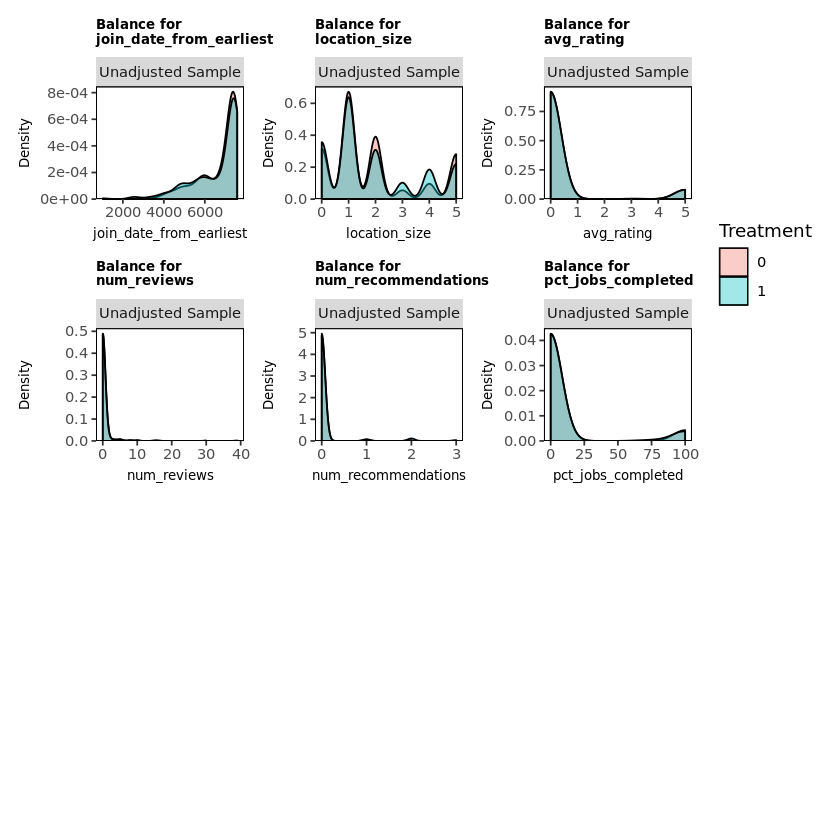

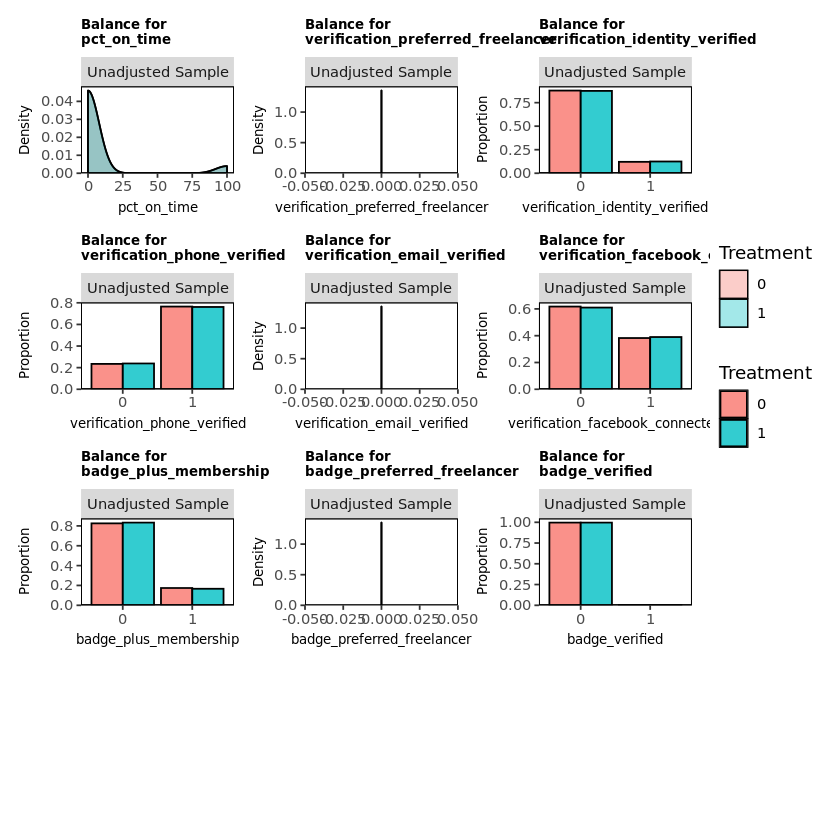

In [ ]:
#Get matched dataset for marketers
marketer_matched_dataset= rbind(marketer[hourly_rate_mout$index.treated,],marketer[hourly_rate_mout$index.control,])

#Create distributional balance plots
covariates <- list('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for(i in 1:length(covariates)) {                    # assign function within loop
  assign(paste0("cov_", i), bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=marketer_matched_dataset, var.name= covariates[[i]])
  + labs(title= sprintf("Balance for\n%s", covariates[[i]])) 
  + theme(plot.title = element_text(size=8, face="bold"), axis.title.x = element_text(size=8), axis.title.y = element_text(size=8) ))
}

cov_1 + cov_2 + cov_3 + cov_4 + cov_5 + cov_6 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

cov_7 + cov_8 + cov_9 + cov_10 + cov_11 + cov_12 + cov_13 + cov_14 +
cov_15 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

In [ ]:
#Check treatment effect estimate
sprintf("HOURLY RATE")
summary(hourly_rate_mout)

sprintf("PAY GRADE")
summary(pay_grade_mout)

[1] "HOURLY RATE"


Estimate...  -0.76613 
AI SE......  5.1524 
T-stat.....  -0.14869 
p.val......  0.8818 

Original number of observations..............  606 
Original number of treated obs...............  248 
Matched number of observations...............  248 
Matched number of observations  (unweighted).  264 



[1] "PAY GRADE"


Estimate...  0.082661 
AI SE......  0.045976 
T-stat.....  1.7979 
p.val......  0.072191 

Original number of observations..............  606 
Original number of treated obs...............  248 
Matched number of observations...............  248 
Matched number of observations  (unweighted).  264 



### g. Matching for software engineers

In [ ]:
attach(swe)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
hourly_rate_mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
pay_grade_mout <- Match(X=X, Y=pay_grade, Tr=gender, Weight.matrix=genout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=hourly_rate_mout, nboots=1000)
summary(mb)

mean............ 4.062864e+01
variance........ 7.827116e+03
var 5:
best............ 3.645950e+02
mean............ 3.695197e+02
variance........ 2.717984e+03
var 6:
best............ 7.022469e+02
mean............ 7.052712e+02
variance........ 1.017499e+03
var 7:
best............ 8.844530e+02
mean............ 8.660701e+02
variance........ 6.573037e+03
var 8:
best............ 5.379482e+02
mean............ 5.403791e+02
variance........ 5.161750e+02
var 9:
best............ 9.368410e+02
mean............ 9.079054e+02
variance........ 1.699925e+04
var 10:
best............ 2.610157e+02
mean............ 2.716342e+02
variance........ 2.275039e+03
var 11:
best............ 9.452472e+02
mean............ 9.370888e+02
variance........ 8.223056e+02
var 12:
best............ 9.372864e+02
mean............ 9.171935e+02
variance........ 1.223421e+04
var 13:
best............ 4.198318e+02
mean............ 4.264489e+02
variance........ 5.501419e+03
var 14:
best............ 9.476791e+02
mean............ 9.341777

                    Length Class  Mode     
BeforeMatching      17     -none- list     
AfterMatching       17     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    6     -none- character
BMsmallestVarNumber  6     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    1     -none- character
AMsmallestVarNumber  1     -none- numeric  

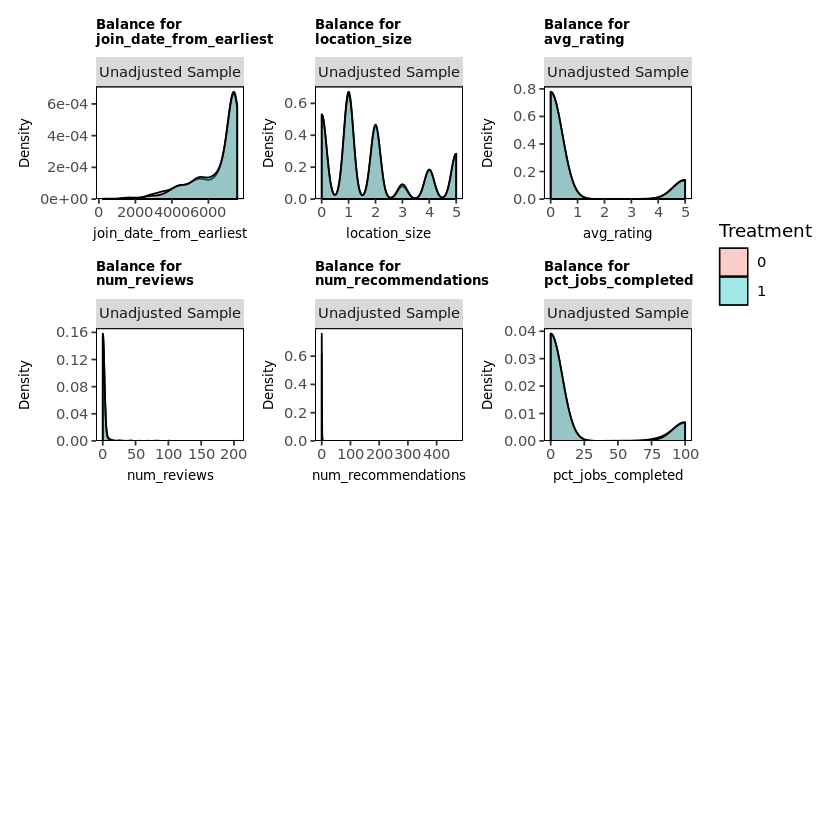

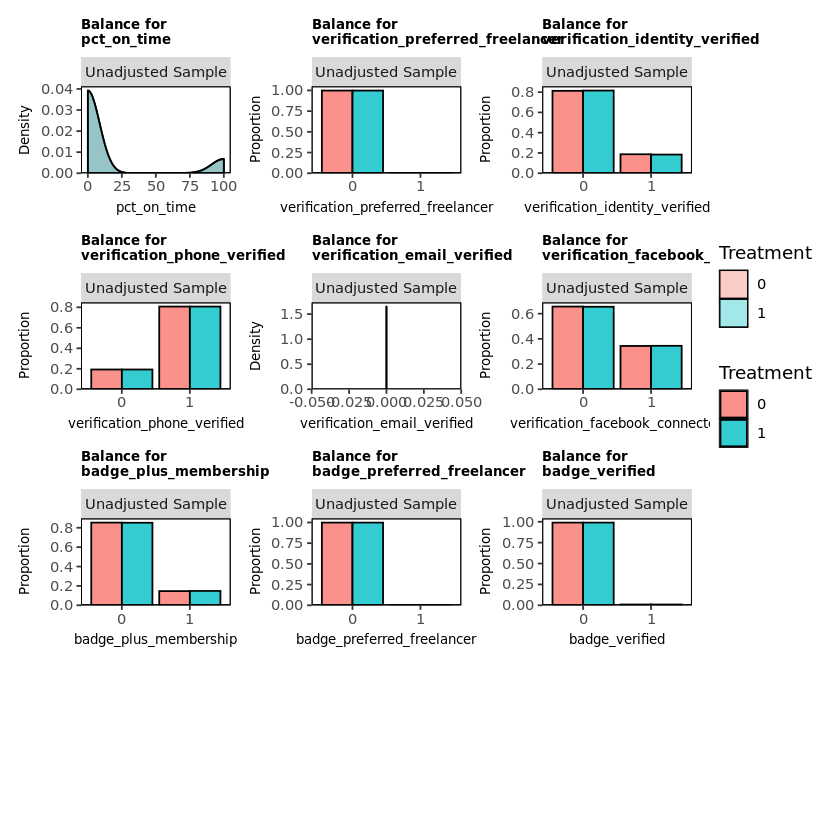

In [ ]:
#Get matched dataset for swe
swe_matched_dataset= rbind(swe[hourly_rate_mout$index.treated,],swe[hourly_rate_mout$index.control,])

#Create distributional balance plots
covariates <- list('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for(i in 1:length(covariates)) {                    # assign function within loop
  assign(paste0("cov_", i), bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=swe_matched_dataset, var.name= covariates[[i]])
  + labs(title= sprintf("Balance for\n%s", covariates[[i]])) 
  + theme(plot.title = element_text(size=8, face="bold"), axis.title.x = element_text(size=8), axis.title.y = element_text(size=8) ))
}

cov_1 + cov_2 + cov_3 + cov_4 + cov_5 + cov_6 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

cov_7 + cov_8 + cov_9 + cov_10 + cov_11 + cov_12 + cov_13 + cov_14 +
cov_15 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

In [ ]:
#Check treatment effect estimate
sprintf("HOURLY RATE")
summary(hourly_rate_mout)

sprintf("PAY GRADE")
summary(pay_grade_mout)

[1] "HOURLY RATE"


Estimate...  -3.9627 
AI SE......  2.6719 
T-stat.....  -1.4831 
p.val......  0.13805 

Original number of observations..............  3665 
Original number of treated obs...............  671 
Matched number of observations...............  671 
Matched number of observations  (unweighted).  716 



[1] "PAY GRADE"


Estimate...  0.014754 
AI SE......  0.036633 
T-stat.....  0.40275 
p.val......  0.68713 

Original number of observations..............  3665 
Original number of treated obs...............  671 
Matched number of observations...............  671 
Matched number of observations  (unweighted).  716 



### h. Matching for translators

In [ ]:
attach(translator)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
hourly_rate_mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
pay_grade_mout <- Match(X=X, Y=pay_grade, Tr=gender, Weight.matrix=genout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=hourly_rate_mout, nboots=1000)
summary(mb)

The following objects are masked from swe:

    avg_rating, badge_plus_membership, badge_preferred_freelancer,
    badge_verified, design_skills, engineering_skills,
    finance_accounting_skills, freelancer_certifications, gender,
    general_skill_certifications, hourly_rate, join_date_from_earliest,
    language_certifications, language_translation_skills,
    location_size, management_skills, marketing_business_skills,
    miscellaneous_skills, name, num_recommendations, num_reviews,
    pay_grade, pct_jobs_completed, pct_on_budget, pct_on_time,
    performance_arts_skills, programming_certifications, search_query,
    teaching_training_skills, technical_programming_skills,
    top_skill_category, top_skill_category_count,
    top_skill_category_encoded, verification_email_verified,
    verification_facebook_connected, verification_identity_verified,
    verification_payment_verified, verification_phone_verified,
    verification_preferred_freelancer, writing_skills


The following

                    Length Class  Mode     
BeforeMatching      17     -none- list     
AfterMatching       17     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    1     -none- character
BMsmallestVarNumber  1     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    1     -none- character
AMsmallestVarNumber  1     -none- numeric  

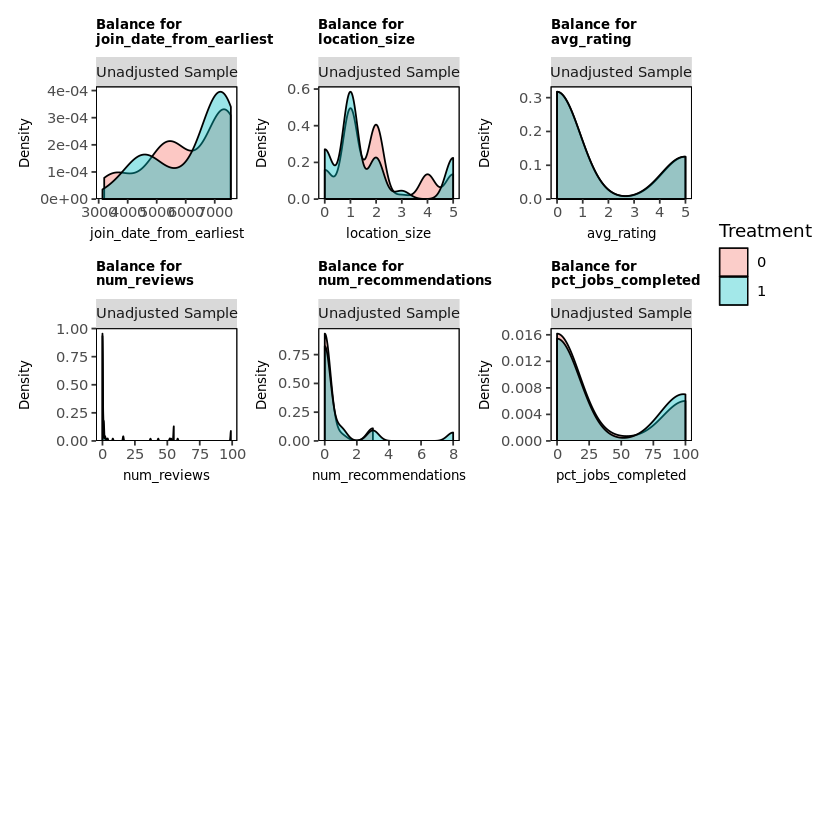

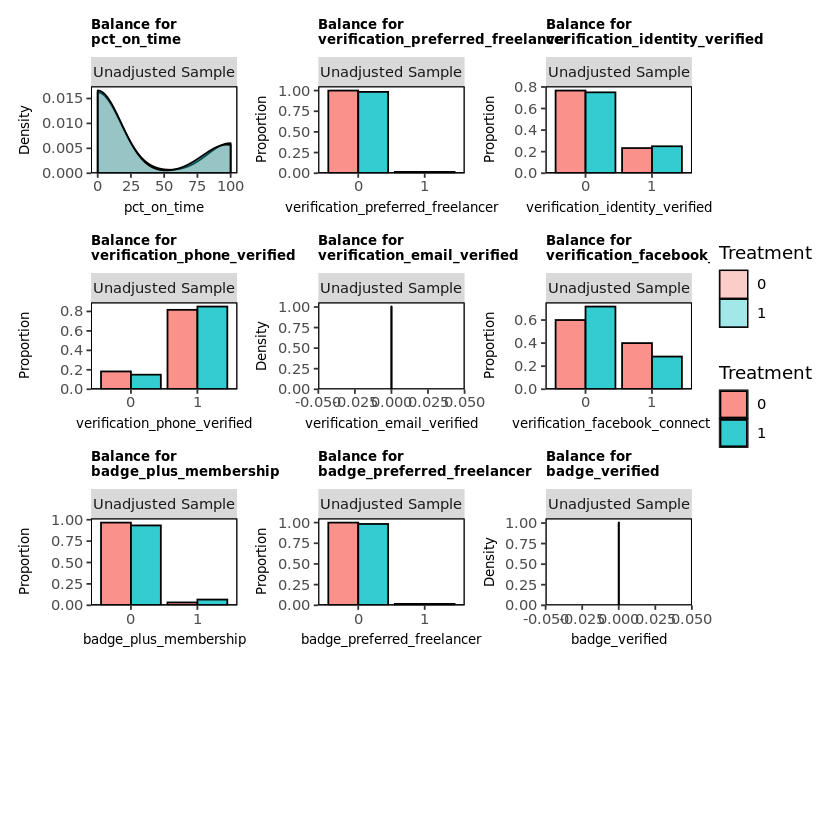

In [ ]:
#Get matched dataset for translators
translator_matched_dataset= rbind(translator[hourly_rate_mout$index.treated,],translator[hourly_rate_mout$index.control,])

#Create distributional balance plots
covariates <- list('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for(i in 1:length(covariates)) {                    # assign function within loop
  assign(paste0("cov_", i), bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=translator_matched_dataset, var.name= covariates[[i]])
  + labs(title= sprintf("Balance for\n%s", covariates[[i]])) 
  + theme(plot.title = element_text(size=8, face="bold"), axis.title.x = element_text(size=8), axis.title.y = element_text(size=8) ))
}

cov_1 + cov_2 + cov_3 + cov_4 + cov_5 + cov_6 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

cov_7 + cov_8 + cov_9 + cov_10 + cov_11 + cov_12 + cov_13 + cov_14 +
cov_15 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

In [ ]:
#Check treatment effect estimate
sprintf("HOURLY RATE")
summary(hourly_rate_mout)

sprintf("PAY GRADE")
summary(pay_grade_mout)

[1] "HOURLY RATE"


Estimate...  -1.5714 
AI SE......  6.2924 
T-stat.....  -0.24973 
p.val......  0.80279 

Original number of observations..............  138 
Original number of treated obs...............  56 
Matched number of observations...............  56 
Matched number of observations  (unweighted).  60 



[1] "PAY GRADE"


Estimate...  0.52143 
AI SE......  0.24231 
T-stat.....  2.1519 
p.val......  0.031407 

Original number of observations..............  138 
Original number of treated obs...............  56 
Matched number of observations...............  56 
Matched number of observations  (unweighted).  60 



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=acc27b92-84be-4130-8026-204943f38189' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>